In [83]:
# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt

# estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model

# model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

# cross validation
from sklearn.model_selection import train_test_split

In [84]:
data = pd.read_csv('Data/03_processed_default_of_credit_card_clients.csv')

In [85]:
data.head()

,id,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,education_graduate school,education_high school,education_other,education_university,marriage_divorce,marriage_married,marriage_others,marriage_single,default_payment_next_month_default,default_payment_next_month_not default
0,1,20000,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,1,0,1,0,0,1,0
1,2,120000,26,-1,2,0,0,0,2,2682,...,0,0,0,1,0,0,0,1,1,0
2,3,90000,34,0,0,0,0,0,0,29239,...,0,0,0,1,0,0,0,1,0,1
3,4,50000,37,0,0,0,0,0,0,46990,...,0,0,0,1,0,1,0,0,0,1
4,5,50000,57,-1,0,-1,0,0,0,8617,...,0,0,0,1,0,1,0,0,0,1


In [86]:
data.drop(['id'], axis = 1, inplace = True) # drop the id because it is irrelevant

In [87]:
data

,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,education_graduate school,education_high school,education_other,education_university,marriage_divorce,marriage_married,marriage_others,marriage_single,default_payment_next_month_default,default_payment_next_month_not default
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,1,0,1,0,0,1,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,0,0,1,0,0,0,1,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,0,0,0,1,0,0,0,1,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,0,0,0,1,0,1,0,0,0,1
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,39,0,0,0,0,0,0,188948,192815,...,0,1,0,0,0,1,0,0,0,1
29996,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,1,0,0,0,0,0,1,0,1
29997,30000,37,4,3,2,-1,0,0,3565,3356,...,0,0,0,1,0,0,0,1,1,0
29998,80000,41,1,-1,0,0,0,-1,-1645,78379,...,0,1,0,0,0,1,0,0,1,0


In [88]:
#features
X = data.iloc[:, 0:30]
print('Summary of feature sample')
X.head()

Summary of feature sample


,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,...,sex_female,sex_male,education_graduate school,education_high school,education_other,education_university,marriage_divorce,marriage_married,marriage_others,marriage_single
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1,0,0,0,0,1,0,1,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,1,0,0,0,0,1,0,0,0,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,1,0,0,0,0,1,0,0,0,1
3,50000,37,0,0,0,0,0,0,46990,48233,...,1,0,0,0,0,1,0,1,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,0,1,0,0,0,1,0,1,0,0


In [89]:
X.shape

(30000, 30)

In [90]:
# The dependent variable is that clients defaulted the next month

In [91]:
#dependent variable
y = data['default_payment_next_month_default']

In [92]:
y.shape

(30000,)

In [93]:
print(y)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default_payment_next_month_default, Length: 30000, dtype: int64


In [94]:
model = LinearRegression(fit_intercept = True,n_jobs = 10)

In [95]:
print(cross_val_score(model, X, y, cv=3)) 

[0.10554262 0.13376886 0.12426777]


Regression Algorithm

In [96]:
algosClass = []

In [97]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [98]:
algosClass.append(('Linear Regression',LinearRegression()))

In [99]:
algosClass.append(('Support Vector Regression',SVR()))

In [100]:
#regression
results = []
names = []
    

In [101]:
for name, model in algosClass:
    result = cross_val_score(model, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [102]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.18441557031725098
Linear Regression 0.12119308107008364
Support Vector Regression -0.08509493803027295


Choose the algorithm: Random Forest

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [104]:
print(X_train.shape, y_train.shape)

(22500, 30) (22500,)


In [105]:
print(X_test.shape, y_test.shape)

(7500, 30) (7500,)


In [106]:
algo = RandomForestRegressor()

In [107]:
modelRF = algo.fit(X_train,y_train)

Predictions

In [108]:
predictions = modelRF.predict(X_test)

In [109]:
from math import sqrt

In [110]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [111]:
predRsquared = r2_score(y_test,predictions)

In [113]:
#Make Predictions
predictions = modelRF.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.182
RMSE: 0.378


In [114]:
modelRF.feature_importances_

array([0.06058215, 0.07397792, 0.16628964, 0.03611141, 0.00945823,
       0.01050269, 0.00943088, 0.01215653, 0.06219435, 0.04275694,
       0.0437222 , 0.0412436 , 0.04078505, 0.04606374, 0.04556871,
       0.05039551, 0.05192717, 0.04655926, 0.0447661 , 0.05150392,
       0.00640141, 0.00677402, 0.00788267, 0.00713365, 0.001987  ,
       0.00832876, 0.00224968, 0.00672056, 0.00041068, 0.00611557])

In [115]:
feature_importances_df = pd.DataFrame({'feature': X.columns.values, \
                                       'importance': modelRF.feature_importances_})

In [116]:
feature_importances_df.sort_values(by="importance",ascending= False)

,feature,importance
2,pay_0,0.166290
1,age,0.073978
8,bill_amt1,0.062194
0,limit_bal,0.060582
16,pay_amt3,0.051927
19,pay_amt6,0.051504
15,pay_amt2,0.050396
17,pay_amt4,0.046559
13,bill_amt6,0.046064
14,pay_amt1,0.045569


- Aparently the education, marital status and sex of an individual doesn't matter in predicting if the person is going to default next month.
- The two most importatnt features are the payment status the month before (in this case September) or pay_0 and the age.

Drop the features that give less than 5% of the information

In [118]:
X_nueva = data.filter(['pay_0', 'age',
       'bill_amt1', 'limit_bal', 'pay_amt3',
       'pay_amt6', 'pay_amt2', 'pay_amt4', 'bill_amt6','pay_amt1',
        'pay_amt5', 'bill_amt3', 'bill_amt2', 'bill_amt4', 'bill_amt5'], axis=1)
X_nueva.columns

Index(['pay_0', 'age', 'bill_amt1', 'limit_bal', 'pay_amt3', 'pay_amt6',
       'pay_amt2', 'pay_amt4', 'bill_amt6', 'pay_amt1', 'pay_amt5',
       'bill_amt3', 'bill_amt2', 'bill_amt4', 'bill_amt5'],
      dtype='object')

In [119]:
from sklearn.model_selection import train_test_split

# train test split
X_train, X_test, y_train, y_test =  train_test_split(X_nueva, y, test_size=0.25)
print("\nX_train, y_train: ", (X_train.shape, y_train.shape))
print("\nX_test, y_test: ", (X_test.shape, y_test.shape))


X_train, y_train:  ((22500, 15), (22500,))

X_test, y_test:  ((7500, 15), (7500,))


In [120]:
modelRF1 = algo.fit(X_train,y_train)

In [122]:
predictions = modelRF1.predict(X_test)

In [123]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [124]:
predRsquared = r2_score(y_test,predictions)

In [125]:
#Make Predictions
predictions = modelRF1.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.179
RMSE: 0.375


In [126]:
feature_importances_df = pd.DataFrame({'feature': X_nueva.columns.values, \
                                       'importance': modelRF1.feature_importances_})

In [127]:
feature_importances_df.sort_values(by="importance",ascending= False)

,feature,importance
0,pay_0,0.184562
1,age,0.086276
2,bill_amt1,0.075067
3,limit_bal,0.068221
6,pay_amt2,0.059086
5,pay_amt6,0.056328
4,pay_amt3,0.056174
8,bill_amt6,0.055243
9,pay_amt1,0.055001
12,bill_amt2,0.053521


This model can explain 18% of the variance in the default of clients. This is really low and is not a good model to implement. Nevertheless, the two most important features in predicting the default are the status of the payment in the month before and the age.

In [194]:
dataCheck = data.filter(['pay_0', 'age', 'default_payment_next_month_default','limit_bal','bill_amt1'], axis=1)

In [130]:
import seaborn as sns

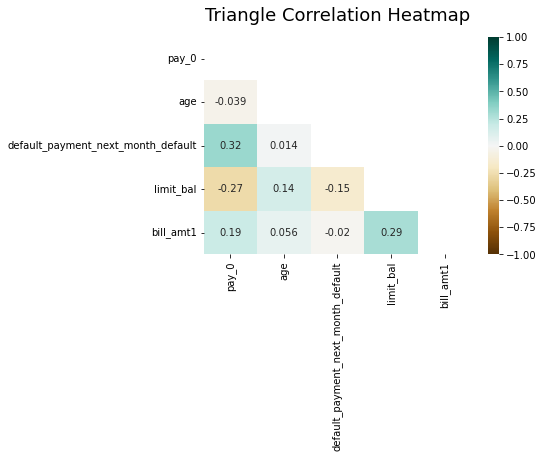

In [195]:
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataCheck.corr(), dtype=bool))
heatmap = sns.heatmap(dataCheck.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

There is a positive correlation of 0.32 between the status of payment in the month before and the default. That means that there is a higher risk of default if there are more delayed payments in the month before.

What if the dependent variable is the balance limit.

In [136]:
#features
X = data.iloc[:, 1:31]
print('Summary of feature sample')
X.head()

Summary of feature sample


,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,...,sex_male,education_graduate school,education_high school,education_other,education_university,marriage_divorce,marriage_married,marriage_others,marriage_single,default_payment_next_month_default
0,24,2,2,-1,-1,-2,-2,3913,3102,689,...,0,0,0,0,1,0,1,0,0,1
1,26,-1,2,0,0,0,2,2682,1725,2682,...,0,0,0,0,1,0,0,0,1,1
2,34,0,0,0,0,0,0,29239,14027,13559,...,0,0,0,0,1,0,0,0,1,0
3,37,0,0,0,0,0,0,46990,48233,49291,...,0,0,0,0,1,0,1,0,0,0
4,57,-1,0,-1,0,0,0,8617,5670,35835,...,1,0,0,0,1,0,1,0,0,0


In [137]:
X.shape

(30000, 30)

In [138]:
#dependent variable
y = data['limit_bal']

In [139]:
y.shape

(30000,)

Lets apply a regresion

In [140]:
model_lim = LinearRegression(fit_intercept = True,n_jobs = 10)

In [141]:
print(cross_val_score(model_lim, X, y, cv=3)) 

[0.35735205 0.38089239 0.33790642]


Regression Algorithm

In [96]:
algosClass = []

In [97]:
algosClass.append(('Random Forest Regressor',RandomForestRegressor()))

In [98]:
algosClass.append(('Linear Regression',LinearRegression()))

In [99]:
algosClass.append(('Support Vector Regression',SVR()))

In [100]:
#regression
results = []
names = []
    

In [142]:
for name, model_lim in algosClass:
    result = cross_val_score(model_lim, X,y, cv=3, scoring='r2')
    names.append(name)
    results.append(result)

In [143]:
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Regressor 0.18441557031725098
Linear Regression 0.12119308107008364
Support Vector Regression -0.08509493803027295
Random Forest Regressor 0.46763715264483635
Linear Regression 0.358716953901899
Support Vector Regression -0.05039629841085288


Choose the algorithm: Random Forest

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [149]:
print(X_train.shape, y_train.shape)

(22500, 30) (22500,)


In [150]:
print(X_test.shape, y_test.shape)

(7500, 30) (7500,)


In [106]:
algo = RandomForestRegressor()

In [151]:
modelRF1 = algo.fit(X_train,y_train)

Predictions

In [152]:
predictions = modelRF1.predict(X_test)

In [109]:
from math import sqrt

In [153]:
rmse = sqrt(mean_squared_error(y_test, predictions))

In [154]:
predRsquared = r2_score(y_test,predictions)

In [155]:
#Make Predictions
predictions = modelRF1.predict(X_test)
predRsquared = r2_score(y_test,predictions)
rmse = sqrt(mean_squared_error(y_test, predictions))
print('R Squared: %.3f' % predRsquared)
print('RMSE: %.3f' % rmse)

R Squared: 0.460
RMSE: 95064.184


This model is better. It explains 46% of the variance in the limit balance.

In [157]:
modelRF1.feature_importances_

array([0.09012524, 0.01614897, 0.06924669, 0.0272914 , 0.00705215,
       0.00555087, 0.00685397, 0.09557001, 0.03814113, 0.03817737,
       0.03262448, 0.04119181, 0.04094707, 0.05365447, 0.12685726,
       0.05726187, 0.04300264, 0.04504689, 0.10827199, 0.00512701,
       0.0050727 , 0.022944  , 0.00389715, 0.00095022, 0.00316116,
       0.00077783, 0.00426906, 0.00015159, 0.00390945, 0.00672351])

In [158]:
feature_importances_df = pd.DataFrame({'feature': X.columns.values, \
                                       'importance': modelRF1.feature_importances_})

In [159]:
feature_importances_df.sort_values(by="importance",ascending= False)

,feature,importance
14,pay_amt2,0.126857
18,pay_amt6,0.108272
7,bill_amt1,0.095570
0,age,0.090125
2,pay_2,0.069247
15,pay_amt3,0.057262
13,pay_amt1,0.053654
17,pay_amt5,0.045047
16,pay_amt4,0.043003
11,bill_amt5,0.041192


In [163]:
other = data.filter(['limit_bal','age','pay_0',
       'bill_amt1','default_payment_next_month_default'], axis=1)
other.columns

Index(['limit_bal', 'age', 'pay_0', 'bill_amt1',
       'default_payment_next_month_default'],
      dtype='object')

In [164]:
other.describe()

,limit_bal,age,pay_0,bill_amt1,default_payment_next_month_default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,-0.016700,51223.330900,0.221200
std,129747.661567,9.217904,1.123802,73635.860576,0.415062
min,10000.000000,21.000000,-2.000000,-165580.000000,0.000000
25%,50000.000000,28.000000,-1.000000,3558.750000,0.000000
50%,140000.000000,34.000000,0.000000,22381.500000,0.000000
75%,240000.000000,41.000000,0.000000,67091.000000,0.000000
max,1000000.000000,79.000000,8.000000,964511.000000,1.000000


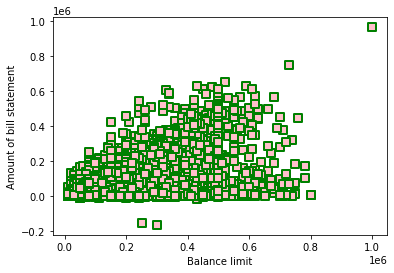

In [166]:
plt.scatter('limit_bal', 'bill_amt1', data = data, c ="pink",
            linewidths = 2,
            marker ="s",
            edgecolor ="green",
            s = 50)
plt.xlabel("Balance limit")
plt.ylabel("Amount of bill statement")
plt.show()


In [186]:
above_mean = other[other['limit_bal'] > 167484]

In [187]:
above_mean['default_payment_next_month_default'].value_counts()

0    10916
1     1990
Name: default_payment_next_month_default, dtype: int64

15.42% of the customers with limit balance bigger than $167,484 (the mean) defaulted.

(array([10916.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  1990.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

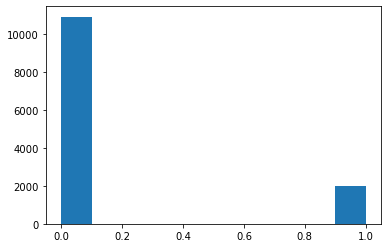

In [188]:
plt.hist(x = 'default_payment_next_month_default', data = above_mean)

In [189]:
above_mean[above_mean['default_payment_next_month_default'] == 1].describe()

,limit_bal,age,pay_0,bill_amt1,default_payment_next_month_default
count,1990.000000,1990.000000,1990.000000,1990.000000,1990.0
mean,277621.949749,37.820603,0.181407,79285.086432,1.0
std,95095.463368,8.805962,1.498032,117176.358624,0.0
min,170000.000000,22.000000,-2.000000,-6676.000000,1.0
25%,200000.000000,31.000000,-1.000000,376.250000,1.0
50%,240000.000000,36.000000,0.000000,6365.500000,1.0
75%,340000.000000,43.000000,1.000000,152347.250000,1.0
max,740000.000000,75.000000,8.000000,613860.000000,1.0


In [190]:
below_mean = other[other['limit_bal'] <= 167484]

In [191]:
below_mean['default_payment_next_month_default'].value_counts()

0    12448
1     4646
Name: default_payment_next_month_default, dtype: int64

27.18% of customers with limit balance lower than $167,484 (the mean) defaulted.

(array([12448.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4646.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

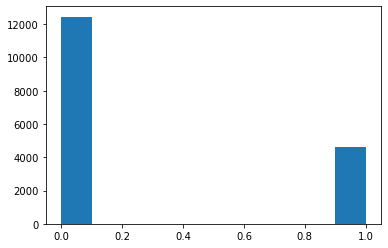

In [192]:
plt.hist(x = 'default_payment_next_month_default', data = below_mean)

In [193]:
below_mean[below_mean['default_payment_next_month_default'] == 1].describe()

,limit_bal,age,pay_0,bill_amt1,default_payment_next_month_default
count,4646.000000,4646.000000,4646.000000,4646.000000,4646.0
mean,66926.388291,34.828455,0.876668,35327.051012,1.0
std,42752.721855,9.916034,1.275616,36291.591810,0.0
min,10000.000000,21.000000,-2.000000,-2000.000000,1.0
25%,30000.000000,26.000000,0.000000,7528.000000,1.0
50%,50000.000000,33.000000,1.000000,23415.000000,1.0
75%,100000.000000,42.000000,2.000000,50478.500000,1.0
max,160000.000000,73.000000,8.000000,288585.000000,1.0
